## Sentiment Analysis Program

In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# twitter API credentials
consumer_key="xxxxxxxxxxxxxxxxxxxxxx"
consumer_secret="xxxxxxxxxxxxxxxxxxxxxxxxx"
access_token="xxxxxxxxxxxxxxxxxxxxxxxxx"
access_secret="xxxxxxxxxxxxxxxxxxxxxxx"

In [3]:
# creating authentication object
authenticate= tweepy.OAuthHandler(consumer_key, consumer_secret)

# set the access token
authenticate.set_access_token(access_token, access_secret)

# creating API object
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [4]:
# extracting 3000 tweets from Flipkart
args=["flipkart","amazonIN","snapdeal"]
flipkart_tweets=[]
query=args[0]
if len(args)==3:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets -filter:replies ",lang="en",result_type= "mixed").items(3000):
        flipkart_tweets.append(status.text)



In [44]:
df_flkt= pd.DataFrame(flipkart_tweets, columns=['Flipkart_tweets'])
df_flkt.head()

,Flipkart_tweets
0,Poonawala is doing it like those 'Big Dhamaka'...
1,Which is your favourite feature of the #realme...
2,Time to capture and #DelightEveryMoment with #...
3,This is ridiculous just connected with Cc he t...
4,This is what happens with me I bought a watch ...


In [45]:
df_flkt.shape

(3000, 1)

In [46]:
df_flkt.to_csv(r'C:\Users\CEA\Documents\Python Scripts\flipkart_tweets.csv',index= True)

In [47]:
df_flkt= pd.read_csv(r'C:\Users\CEA\Documents\Python Scripts\flipkart_tweets.csv')

In [48]:
# clean the text
# create a function to clean the text

def cleantxt(text):
    text= text.lower()
    text= re.sub(r"http\S+", "", text)
    text= re.sub('@[^\s]+','',text)
    text= re.sub(r'\W',' ',text)
    text= re.sub(r'\d',' ',text)
    text= re.sub(r'\s+[a-z]\s+',' ',text)
    text= re.sub(r"^[a-z]\s+"," ", text)
    text= text.strip()
    text= re.sub(r'\s+',' ',text)
    
    return text

# cleaning the text
df_flkt['Flipkart_tweets']= df_flkt['Flipkart_tweets'].apply(cleantxt)

# show the cleaned text
df_flkt.head(10)

,Unnamed: 0,Flipkart_tweets
0,0,poonawala is doing it like those big dhamaka s...
1,1,which is your favourite feature of the realme ...
2,2,time to capture and delighteverymoment with vi...
3,3,this is ridiculous just connected with cc he t...
4,4,this is what happens with me bought watch from...
5,5,be your happiest self with swatchshil keep int...
6,6,dear where is my order it was supposed to reac...
7,7,this is what happens with me bought watch from...
8,8,iffalcon cm inches ultra hd smart certified an...
9,9,guys help me find any pharmacy in patna which ...


In [49]:
# create a function to get subjectivity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

# create two coulumns in dataframe
df_flkt['subjectivity']= df_flkt['Flipkart_tweets'].apply(getsubjectivity)
df_flkt['Polarity']= df_flkt['Flipkart_tweets'].apply(getpolarity)

# see the new dataframe
df_flkt.head(10)

,Unnamed: 0,Flipkart_tweets,subjectivity,Polarity
0,0,poonawala is doing it like those big dhamaka s...,0.216667,0.125000
1,1,which is your favourite feature of the realme ...,1.000000,0.000000
2,2,time to capture and delighteverymoment with vi...,1.000000,1.000000
3,3,this is ridiculous just connected with cc he t...,0.500000,-0.166667
4,4,this is what happens with me bought watch from...,0.000000,0.000000
5,5,be your happiest self with swatchshil keep int...,0.550000,0.168182
6,6,dear where is my order it was supposed to reac...,0.000000,0.000000
7,7,this is what happens with me bought watch from...,0.000000,0.000000
8,8,iffalcon cm inches ultra hd smart certified an...,0.642857,0.214286
9,9,guys help me find any pharmacy in patna which ...,0.000000,0.000000


In [50]:
df_flkt.iloc[7][3]

0.0

In [51]:
senti_flkt=[]
j=0
for i in df_flkt['Flipkart_tweets']:
    
    if df_flkt.iloc[j][3] >= 0.25 : 
#         print("Positive") 
        senti_flkt.append("Positive")
  
    elif df_flkt.iloc[j][3] <= - 0.25 : 
#         print("Negative") 
        senti_flkt.append("Negative")
  
    else : 
#         print("Neutral")
        senti_flkt.append("Neutral")
    j=j+1


In [52]:
print(senti_flkt[0:7])

['Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral']


In [53]:
Sentiment_flkt=pd.DataFrame(senti_flkt)
Sentiment_flkt.columns=["sentiment"]
Sentiment_flkt.head(10)

,sentiment
0,Neutral
1,Neutral
2,Positive
3,Neutral
4,Neutral
5,Neutral
6,Neutral
7,Neutral
8,Neutral
9,Neutral


In [54]:
Sentiment_flkt.sentiment.value_counts()

Neutral     2072
Positive     681
Negative     247
Name: sentiment, dtype: int64

In [55]:
# adding the sentiment column to the dataframe
df_flkt_f=pd.concat([df_flkt,Sentiment_flkt], axis=1)
df_flkt_f.head(7)

,Unnamed: 0,Flipkart_tweets,subjectivity,Polarity,sentiment
0,0,poonawala is doing it like those big dhamaka s...,0.216667,0.125000,Neutral
1,1,which is your favourite feature of the realme ...,1.000000,0.000000,Neutral
2,2,time to capture and delighteverymoment with vi...,1.000000,1.000000,Positive
3,3,this is ridiculous just connected with cc he t...,0.500000,-0.166667,Neutral
4,4,this is what happens with me bought watch from...,0.000000,0.000000,Neutral
5,5,be your happiest self with swatchshil keep int...,0.550000,0.168182,Neutral
6,6,dear where is my order it was supposed to reac...,0.000000,0.000000,Neutral


In [59]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS) 

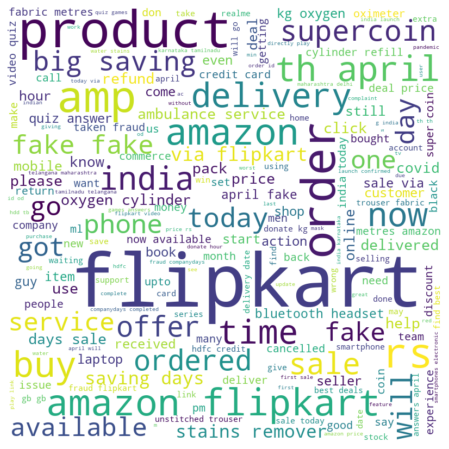

In [60]:
# Plotting the word cloud

allwords= ''.join([twts for twts in df_flkt_f['Flipkart_tweets']])
Wordcloud = WordCloud(width = 800, height= 800, random_state=21, min_font_size=10, background_color='white', stopwords= stopwords).generate(allwords)

plt.figure(figsize=(9,8), facecolor= None)
plt.imshow(Wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

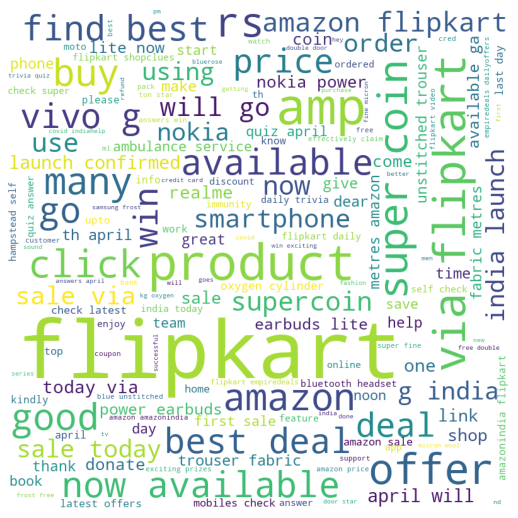

In [63]:
# WordCloud of "Positive" (Flipkart)
comment_words = '' 
   
for val in df_flkt_f[df_flkt_f.sentiment=="Positive"].Flipkart_tweets: 
    tokens = val.split()       
    comment_words += " ".join(tokens)+" "

wordcloud_p = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords= stopwords,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 7), facecolor = None) 
plt.imshow(wordcloud_p) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

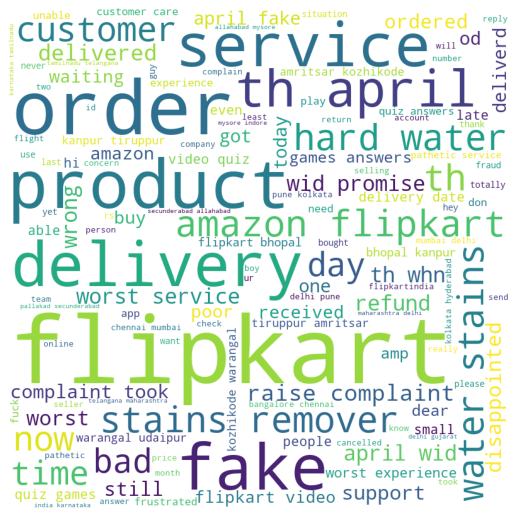

In [64]:
# WordCloud of "Negative" (Flipkart)
comment_words = '' 
   
for val in df_flkt_f[df_flkt_f.sentiment=="Negative"].Flipkart_tweets: 
    tokens = val.split()       
    comment_words += " ".join(tokens)+" "

wordcloud_n = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords= stopwords,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 7), facecolor = None) 
plt.imshow(wordcloud_n) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Sentiment analysis for Amazon India Account

In [67]:
# Extracting 3000 tweets from Amazon India
amazon_tweets=[]        
query=args[1]
if len(args)==3:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets -filter:replies",lang="en",result_type= "mixed").items(3000):
        amazon_tweets.append(status.text)

In [68]:
df_amazon= pd.DataFrame(amazon_tweets, columns=['amazon_tweets'])
df_amazon.head()

,amazon_tweets
0,𝗞𝗞𝗥 𝗙𝗶𝗹𝗺𝘀 𝗘𝗽. 𝟰: Coach McCullum says he’s the ...
1,"Initially unsold in '14, 𝙈𝙑𝙋 the next year. 💪🏼..."
2,#Mi11XPro: A Cut Above The Best!💪\n\n📱#Snapdra...
3,"Hey @amazonIN , I ordered a book from amazon, ..."
4,My amazon account has been blocked my @amazonI...


In [69]:
df_amazon.shape

(2914, 1)

In [70]:
df_amazon.to_csv(r'C:\Users\CEA\Documents\Python Scripts\amazon_tweets.csv',index= True)

In [71]:
df_amazon= pd.read_csv(r'C:\Users\CEA\Documents\Python Scripts\amazon_tweets.csv')

In [72]:
# cleaning the text
df_amazon['amazon_tweets']= df_amazon['amazon_tweets'].apply(cleantxt)

# show the cleaned text
df_amazon.head(10)

,Unnamed: 0,amazon_tweets
0,0,𝗞𝗞𝗥 𝗙𝗶𝗹𝗺𝘀 𝗘𝗽 coach mccullum says he the michae...
1,1,initially unsold in 𝙈𝙑𝙋 the next year story of...
2,2,mi xpro cut above the best snapdragon hz amole...
3,3,hey ordered book from amazon returned it and n...
4,4,my amazon account has been blocked my without ...
5,5,dk home appliances professional series finger ...
6,6,can we involve com like etc to list verified o...
7,7,team amazon besharmi ki had kardi apne april m...
8,8,dear m not able to login to my account also m ...
9,9,theme of the month for subscribers is here dow...


In [73]:
# create two coulumns in dataframe subjectivity and polarity
df_amazon['subjectivity']= df_amazon['amazon_tweets'].apply(getsubjectivity)
df_amazon['Polarity']= df_amazon['amazon_tweets'].apply(getpolarity)

# see the new dataframe
df_amazon.head(10)

,Unnamed: 0,amazon_tweets,subjectivity,Polarity
0,0,𝗞𝗞𝗥 𝗙𝗶𝗹𝗺𝘀 𝗘𝗽 coach mccullum says he the michae...,0.000000,0.000000
1,1,initially unsold in 𝙈𝙑𝙋 the next year story of...,0.333333,0.166667
2,2,mi xpro cut above the best snapdragon hz amole...,0.400000,0.566667
3,3,hey ordered book from amazon returned it and n...,0.000000,0.000000
4,4,my amazon account has been blocked my without ...,0.000000,0.000000
5,5,dk home appliances professional series finger ...,0.100000,0.100000
6,6,can we involve com like etc to list verified o...,0.000000,0.000000
7,7,team amazon besharmi ki had kardi apne april m...,0.000000,0.000000
8,8,dear m not able to login to my account also m ...,0.625000,-0.250000
9,9,theme of the month for subscribers is here dow...,0.000000,0.000000


In [74]:
senti_amazon=[]
j=0
for i in df_amazon['amazon_tweets']:
    
    if df_amazon.iloc[j][3] >= 0.25 : 
#         print("Positive") 
        senti_amazon.append("Positive")
  
    elif df_amazon.iloc[j][3] <= - 0.25 : 
#         print("Negative") 
        senti_amazon.append("Negative")
  
    else : 
#         print("Neutral")
        senti_amazon.append("Neutral")
    j=j+1


In [75]:
Sentiment_amazon=pd.DataFrame(senti_amazon)
Sentiment_amazon.columns=["sentiment"]
Sentiment_amazon.head(10)

,sentiment
0,Neutral
1,Neutral
2,Positive
3,Neutral
4,Neutral
5,Neutral
6,Neutral
7,Neutral
8,Negative
9,Neutral


In [77]:
Sentiment_amazon.sentiment.value_counts()

Neutral     1523
Positive    1254
Negative     137
Name: sentiment, dtype: int64

In [78]:
# adding the sentiment column to the dataframe
df_amazon_f=pd.concat([df_amazon,Sentiment_amazon], axis=1)
df_amazon_f.head(7)

,Unnamed: 0,amazon_tweets,subjectivity,Polarity,sentiment
0,0,𝗞𝗞𝗥 𝗙𝗶𝗹𝗺𝘀 𝗘𝗽 coach mccullum says he the michae...,0.000000,0.000000,Neutral
1,1,initially unsold in 𝙈𝙑𝙋 the next year story of...,0.333333,0.166667,Neutral
2,2,mi xpro cut above the best snapdragon hz amole...,0.400000,0.566667,Positive
3,3,hey ordered book from amazon returned it and n...,0.000000,0.000000,Neutral
4,4,my amazon account has been blocked my without ...,0.000000,0.000000,Neutral
5,5,dk home appliances professional series finger ...,0.100000,0.100000,Neutral
6,6,can we involve com like etc to list verified o...,0.000000,0.000000,Neutral


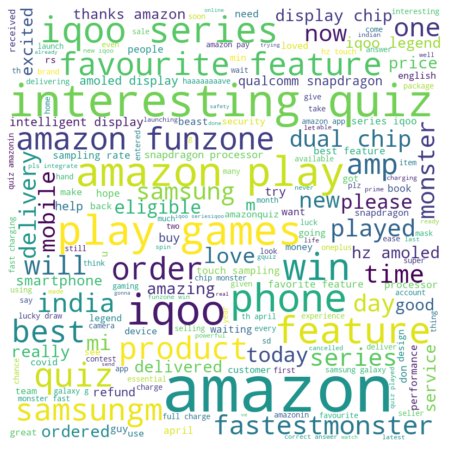

In [79]:
# Plotting the word cloud

allwords= ''.join([twts for twts in df_amazon_f['amazon_tweets']])
Wordcloud = WordCloud(width = 800, height= 800, random_state=21, min_font_size=10, background_color='white', stopwords= stopwords).generate(allwords)

plt.figure(figsize=(9,8), facecolor= None)
plt.imshow(Wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

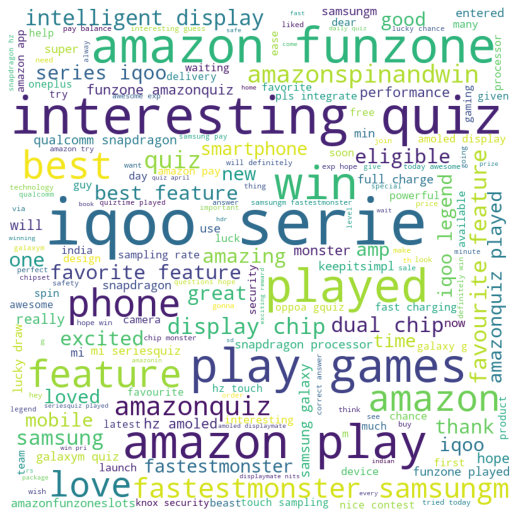

In [80]:
# WordCloud of "Positive" (Amazon)
comment_words = '' 
   
for val in df_amazon_f[df_amazon_f.sentiment=="Positive"].amazon_tweets: 
    tokens = val.split()       
    comment_words += " ".join(tokens)+" "

wordcloud_p = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords= stopwords,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 7), facecolor = None) 
plt.imshow(wordcloud_p) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

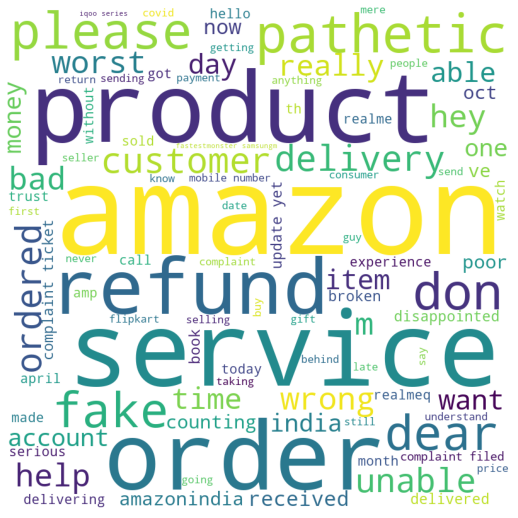

In [81]:
# WordCloud of "Negative" (Amazon)
comment_words = '' 
   
for val in df_amazon_f[df_amazon_f.sentiment=="Negative"].amazon_tweets: 
    tokens = val.split()       
    comment_words += " ".join(tokens)+" "

wordcloud_n = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords= stopwords,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 7), facecolor = None) 
plt.imshow(wordcloud_n) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Sentiment analysis for Snapdeal twiter

In [93]:
# extracting 3000 tweets from snapdeal
snapdeal_tweets=[]        
query=args[2]
if len(args)==3:
    for status in tweepy.Cursor(api.search,q=query+"  ",lang="en",result_type= "mixed").items(3000):
        snapdeal_tweets.append(status.text)

In [94]:
df_sdeal= pd.DataFrame(snapdeal_tweets, columns=['snapdeal_tweets'])
df_sdeal.head()

,snapdeal_tweets
0,Heartbroken to share that our colleague of 9 y...
1,We have waived shipping charges on all product...
2,@HarjotPal4 Getting this checked with the conc...
3,@BasavarajKandri Hi! Please elaborate on what ...
4,@Snapdeal_Help I am basavaraj kandri. Please ...


In [95]:
df_sdeal.shape

(192, 1)

In [96]:
df_sdeal.to_csv(r'C:\Users\CEA\Documents\Python Scripts\snapdeal_tweets.csv',index= True)

In [97]:
df_sdeal= pd.read_csv(r'C:\Users\CEA\Documents\Python Scripts\snapdeal_tweets.csv')

In [98]:
# cleaning the text
df_sdeal['snapdeal_tweets']= df_sdeal['snapdeal_tweets'].apply(cleantxt)

# show the cleaned text
df_sdeal.head(10)

,Unnamed: 0,snapdeal_tweets
0,0,heartbroken to share that our colleague of yea...
1,1,we have waived shipping charges on all product...
2,2,getting this checked with the concerned team a...
3,3,hi please elaborate on what went wrong via pri...
4,4,am basavaraj kandri please help me
5,5,work on this report as soon as possible
6,6,we always request our customers to never share...
7,7,hi apologies for the experience you have been ...
8,8,manufacturer already in loop get ready for
9,9,snapdeal is fake companythis company does not ...


In [99]:
# create two coulumns in dataframe subjectivity and polarity
df_sdeal['subjectivity']= df_sdeal['snapdeal_tweets'].apply(getsubjectivity)
df_sdeal['Polarity']= df_sdeal['snapdeal_tweets'].apply(getpolarity)

# see the new dataframe
df_sdeal.head(10)

,Unnamed: 0,snapdeal_tweets,subjectivity,Polarity
0,0,heartbroken to share that our colleague of yea...,0.225000,-0.041667
1,1,we have waived shipping charges on all product...,0.000000,0.000000
2,2,getting this checked with the concerned team a...,0.200000,0.200000
3,3,hi please elaborate on what went wrong via pri...,0.758333,0.000000
4,4,am basavaraj kandri please help me,0.000000,0.000000
5,5,work on this report as soon as possible,1.000000,0.000000
6,6,we always request our customers to never share...,0.183333,0.000000
7,7,hi apologies for the experience you have been ...,0.000000,0.000000
8,8,manufacturer already in loop get ready for,0.500000,0.200000
9,9,snapdeal is fake companythis company does not ...,1.000000,-0.500000


In [100]:
senti_snapdeal=[]
j=0
for i in df_sdeal['snapdeal_tweets']:
    
    if df_sdeal.iloc[j][3] >= 0.25 : 
#         print("Positive") 
        senti_snapdeal.append("Positive")
  
    elif df_sdeal.iloc[j][3] <= - 0.25 : 
#         print("Negative") 
        senti_snapdeal.append("Negative")
  
    else : 
#         print("Neutral")
        senti_snapdeal.append("Neutral")
    j=j+1

In [101]:
Sentiment_snapdeal=pd.DataFrame(senti_snapdeal)
Sentiment_snapdeal.columns=["sentiment"]
Sentiment_snapdeal.head(10)

,sentiment
0,Neutral
1,Neutral
2,Neutral
3,Neutral
4,Neutral
5,Neutral
6,Neutral
7,Neutral
8,Neutral
9,Negative


In [102]:
Sentiment_snapdeal.sentiment.value_counts()

Neutral     147
Positive     26
Negative     19
Name: sentiment, dtype: int64

In [103]:
# adding the sentiment column to the dataframe
df_sdeal_f=pd.concat([df_sdeal,Sentiment_snapdeal], axis=1)
df_sdeal_f.head(7)

,Unnamed: 0,snapdeal_tweets,subjectivity,Polarity,sentiment
0,0,heartbroken to share that our colleague of yea...,0.225000,-0.041667,Neutral
1,1,we have waived shipping charges on all product...,0.000000,0.000000,Neutral
2,2,getting this checked with the concerned team a...,0.200000,0.200000,Neutral
3,3,hi please elaborate on what went wrong via pri...,0.758333,0.000000,Neutral
4,4,am basavaraj kandri please help me,0.000000,0.000000,Neutral
5,5,work on this report as soon as possible,1.000000,0.000000,Neutral
6,6,we always request our customers to never share...,0.183333,0.000000,Neutral


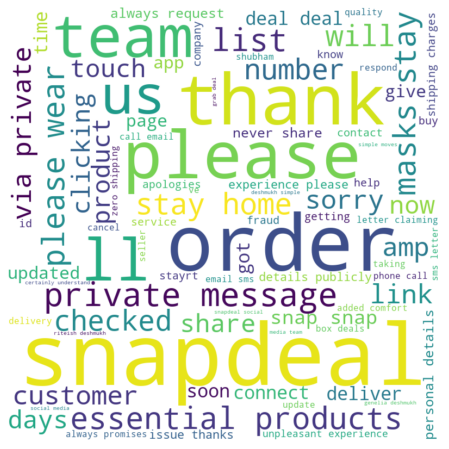

In [104]:
# Plotting the word cloud

allwords= ''.join([twts for twts in df_sdeal_f['snapdeal_tweets']])
Wordcloud = WordCloud(width = 800, height= 800, random_state=21, min_font_size=10, background_color='white', stopwords= stopwords).generate(allwords)

plt.figure(figsize=(9,8), facecolor= None)
plt.imshow(Wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

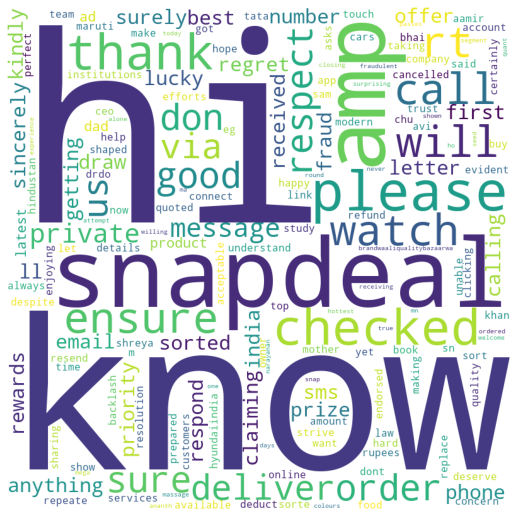

In [105]:
# WordCloud of "Positive" (snapdeal)
comment_words = '' 
   
for val in df_sdeal_f[df_sdeal_f.sentiment=="Positive"].snapdeal_tweets: 
    tokens = val.split()       
    comment_words += " ".join(tokens)+" "

wordcloud_p = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords= stopwords,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 7), facecolor = None) 
plt.imshow(wordcloud_p) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

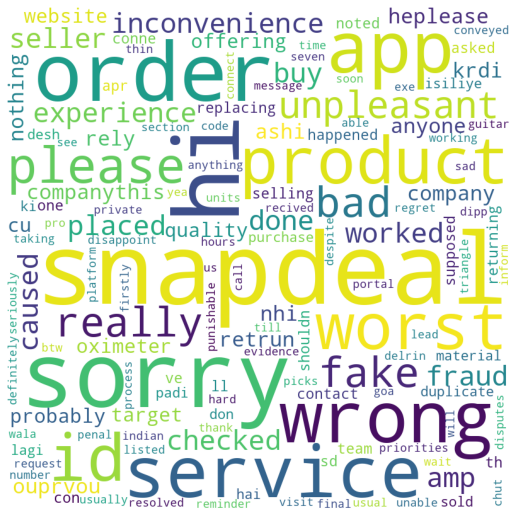

In [106]:
# WordCloud of "Negative" (snapdeal)
comment_words = '' 
   
for val in df_sdeal_f[df_sdeal_f.sentiment=="Negative"].snapdeal_tweets: 
    tokens = val.split()       
    comment_words += " ".join(tokens)+" "

wordcloud_n = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords= stopwords,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 7), facecolor = None) 
plt.imshow(wordcloud_n) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()